In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sounddevice as sd
import scipy.io as spio
import scipy.signal as spsg
from skimage.filters import laplace, sobel, prewitt, gaussian
from skimage import segmentation
from skimage.util import random_noise
from skimage.feature import canny

### Task 1
Perform template matching with respect to `"Alphabet images"`.

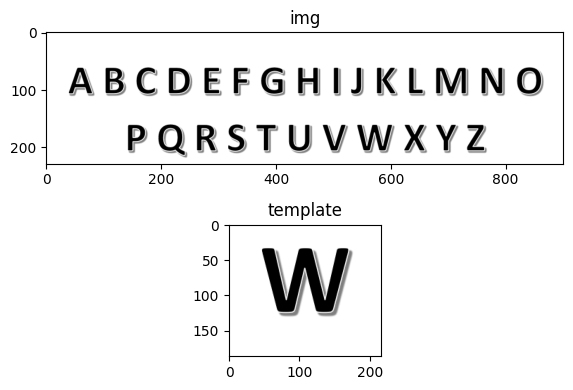

In [2]:
img = cv.imread('uzimages/A-Z.png', cv.IMREAD_GRAYSCALE)
template = cv.imread('uzimages/W.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 4))
plt.subplot(211), plt.imshow(img, cmap="gray"), plt.title("img")
plt.subplot(212), plt.imshow(template, cmap="gray"), plt.title("template")
plt.tight_layout()

The given template image size is larger than the match in the full image. We can resize the given template to match the shape of the letters in the full image.

(<matplotlib.image.AxesImage at 0x73853b9ff170>,
 Text(0.5, 1.0, 'Resized template'))

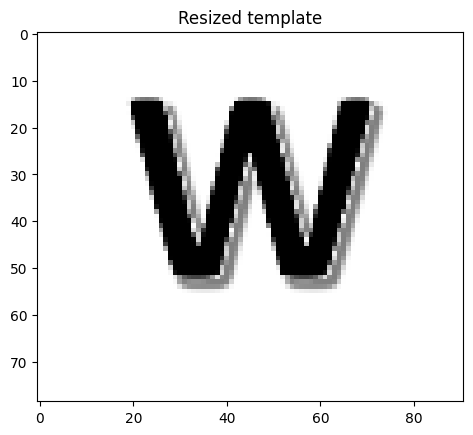

In [3]:
# plt.imshow(img[150:, 530:620]) ---- W sliced from the A-Z image to resize the template
# from the we can get the shape the template should be in
h, w = img[150:, 530:621].shape
template = cv.resize(template, (w, h))
plt.imshow(template, cmap="gray"), plt.title("Resized template")

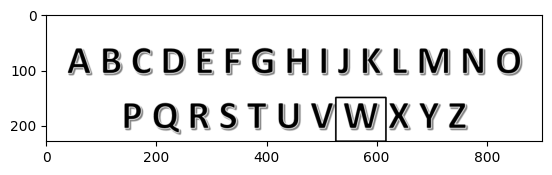

In [4]:
img_copy = img.copy()
res = cv.matchTemplate(img, template, cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv.rectangle(img, top_left, bottom_right, 0, 2)
plt.imshow(img, cmap="gray")

### Task 2
Perform template matching of `"Voice signal"`. Perform the following step by step.

1. Record your voice with sampling rate of `8000 Hz` for a duration of one second. The word to be uttered is `"Hello"`. This has to be done uniformly so that the length of the signal remains the same for everyone.
2. Perform correlation of `"Hello"` with respect to other `"Hello"` signal and find the best match.

For this task, I've used various audio files generated from online tts tools for a decent quality audio file, which was originally sampled at `48kHz`, and was rewritten with `8kHz`.

In [5]:
# Load audio files
_, template = spio.wavfile.read("hellovoices/Betty_A.wav")

_, beatrice = spio.wavfile.read("hellovoices/Beatrice_B.wav")
_, robert = spio.wavfile.read("hellovoices/Robert_B.wav")
_, betty = spio.wavfile.read("hellovoices/Betty_A.wav")
_, linda = spio.wavfile.read("hellovoices/Linda_A.wav")

In [6]:
# Find minimum length among all signals
min_length = min(list(map(len, [beatrice, robert, betty, linda]))) + 1
template = template[:min_length]
beatrice = beatrice[:min_length]
robert = robert[:min_length]
betty = betty[:min_length]
linda = linda[:min_length]

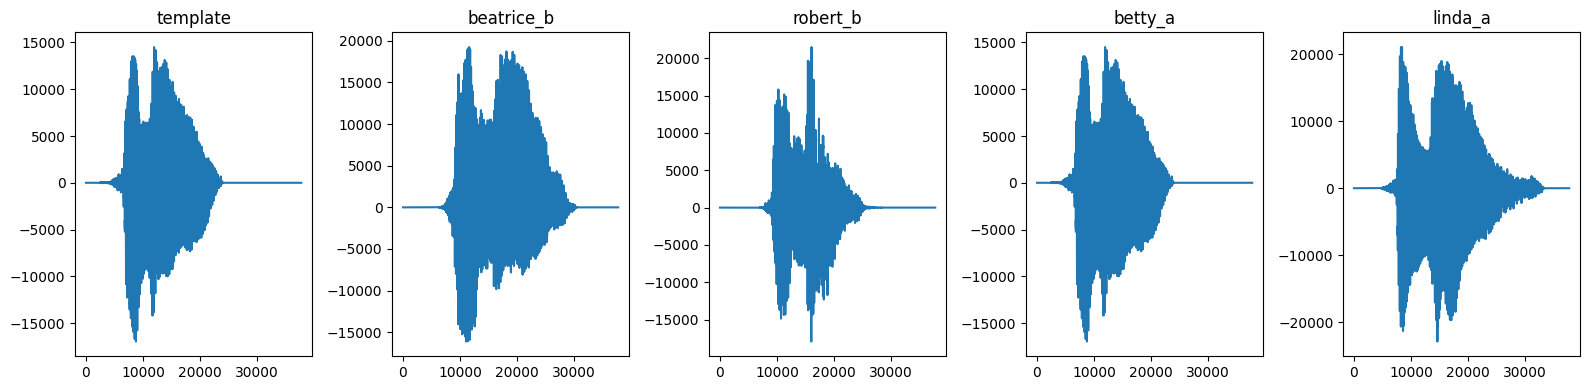

In [7]:
# Plot signals
plt.figure(figsize=(16, 4))
plt.subplot(151), plt.plot(template), plt.title("template")
plt.subplot(152), plt.plot(beatrice), plt.title("beatrice_b")
plt.subplot(153), plt.plot(robert), plt.title("robert_b")
plt.subplot(154), plt.plot(betty), plt.title("betty_a")
plt.subplot(155), plt.plot(linda), plt.title("linda_a")
plt.tight_layout()

In [8]:
# Normalize signals
def normalize(signal):
    return (signal - np.mean(signal)) / np.std(signal)

template = normalize(template)
beatrice = normalize(beatrice)
robert = normalize(robert)
betty = normalize(betty)
linda = normalize(linda)

In [9]:
# Perform Cross correlation
cc1 = spsg.correlate(template, beatrice, mode="full")
cc2 = spsg.correlate(template, robert, mode="full")
cc3 = spsg.correlate(template, betty, mode="full")
cc4 = spsg.correlate(template, linda, mode="full")

cc = [cc1, cc2, cc3, cc4]
m = list(map(np.max, cc))
best_match = np.argmax(m)
best_match

np.int64(2)

yup, that's Betty_A, the template voice's `"Hello"`.

### Task 3
Perform template matching of `"Voice signal"`. Perform the following step by step.

1. Take a photograph of a good document using your mobile phone. Utmost care has to be taken to capture the document image. Don’t download the document image from the internet. The document wordings should be good.
2. Apply the following operators (i) Robert (ii) Prewitt (iii) Sobel and (iv) Canny edge detector to the input document image and analyse the result.

In [10]:
def robert_cross_operator(img):
    Hx = np.array([[1, 0],
                   [0, -1]])
    Hy = np.array([[0, 1],
                   [-1, 0]])
    
    Gx = cv.filter2D(img, cv.CV_64F, Hx)
    Gy = cv.filter2D(img, cv.CV_64F, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

In [11]:
def prewitt_gradient_edge_detector(img):
    Hx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    Hy = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])
    
    Gx = cv.filter2D(img, cv.CV_64F, Hx)
    Gy = cv.filter2D(img, cv.CV_64F, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

In [12]:
def sobel_operator(img):   
    Gx = cv.Sobel(img, cv.CV_64F, 1, 0, 3)
    Gy = cv.Sobel(img, cv.CV_64F, 0, 1, 3)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

In [13]:
def canny_edge_detector(img):
    edges = cv.Canny(img, 100, 200)
    return edges

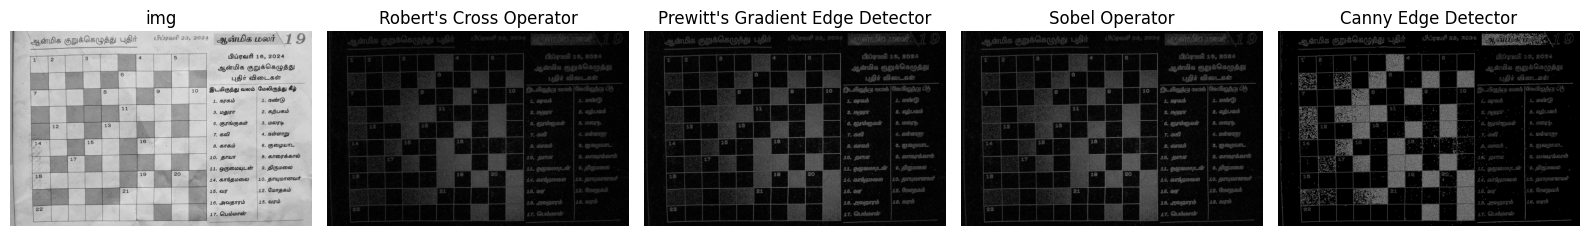

In [14]:
img = cv.imread("img_task3.jpeg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 16))
plt.subplot(151), plt.imshow(img, cmap='gray'), plt.title("img"), plt.axis('off')
plt.subplot(152), plt.imshow(robert_cross_operator(img), cmap='gray'), plt.title("Robert's Cross Operator"), plt.axis('off')
plt.subplot(153), plt.imshow(prewitt_gradient_edge_detector(img), cmap='gray'), plt.title("Prewitt's Gradient Edge Detector"), plt.axis('off')
plt.subplot(154), plt.imshow(sobel_operator(img), cmap='gray'), plt.title("Sobel Operator"), plt.axis('off')
plt.subplot(155), plt.imshow(canny_edge_detector(img), cmap='gray'), plt.title("Canny Edge Detector"), plt.axis('off')
plt.tight_layout()

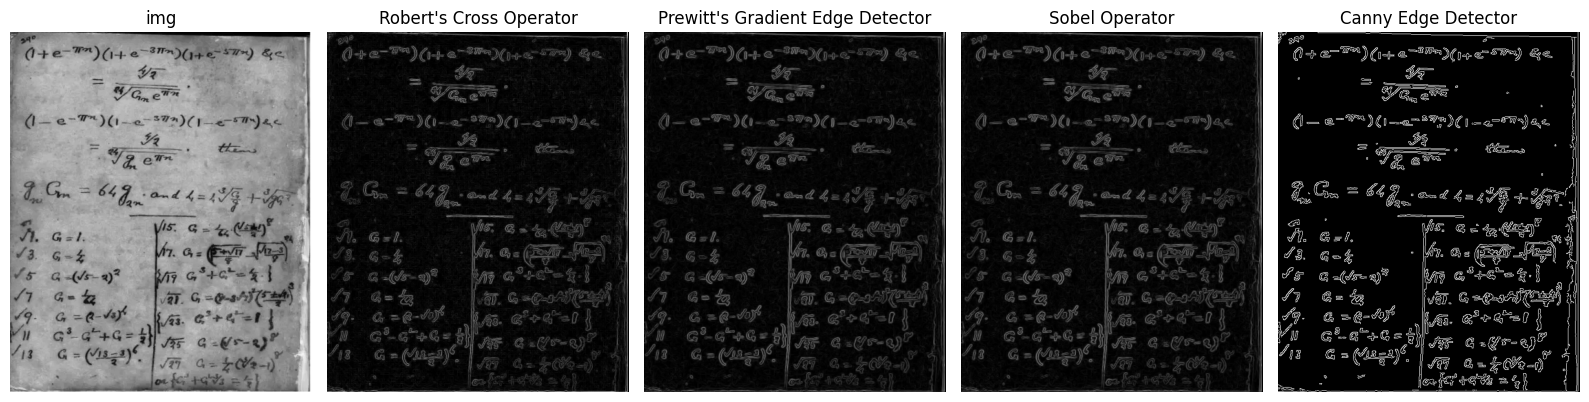

In [15]:
img = cv.imread("img2_task3.webp", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 16))
plt.subplot(151), plt.imshow(img, cmap='gray'), plt.title("img"), plt.axis('off')
plt.subplot(152), plt.imshow(robert_cross_operator(img), cmap='gray'), plt.title("Robert's Cross Operator"), plt.axis('off')
plt.subplot(153), plt.imshow(prewitt_gradient_edge_detector(img), cmap='gray'), plt.title("Prewitt's Gradient Edge Detector"), plt.axis('off')
plt.subplot(154), plt.imshow(sobel_operator(img), cmap='gray'), plt.title("Sobel Operator"), plt.axis('off')
plt.subplot(155), plt.imshow(canny_edge_detector(img), cmap='gray'), plt.title("Canny Edge Detector"), plt.axis('off')
plt.tight_layout()

### Task 4
#### Watershed algorithm

The sample code given below performs image segmentation using watershed algorithm. Analyse the role of elevation map and marker. For elevation map, Laplacian operator which is basically a second order derivative is applied. What will happen it is replaced by first order derivative filters like Sobel, Prewit and Canny?  Will it be possible to show that water shed algorithm results in over segmentation in the presence of noise?

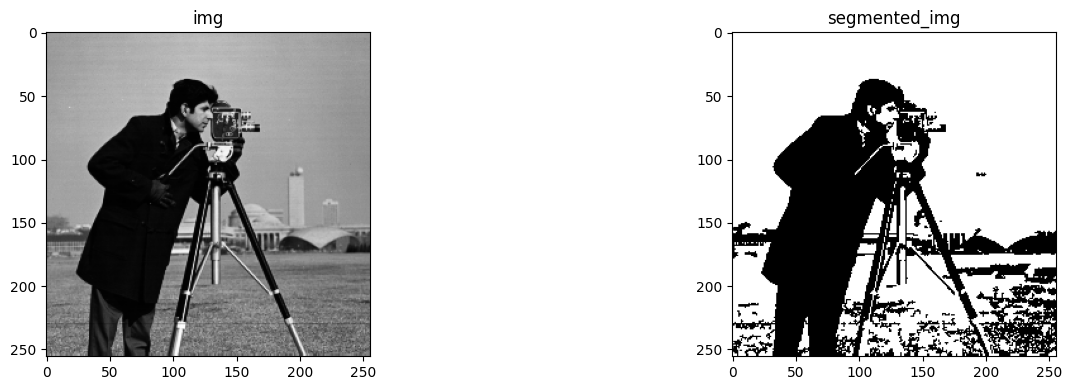

In [16]:
# Given code
# Read the input image
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
# Extract the edge information
elevation_map = laplace(img)
# Define the markers
markers = np.zeros_like(img)
markers[img < 100] = 1
markers[img > 125] = 2
# Perform watershed based segmentation
segmented_img = segmentation.watershed(elevation_map, markers)
# Displaying the results
plt.figure(figsize=(16, 4))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title("img")
plt.subplot(122), plt.imshow(segmented_img, cmap="gray"), plt.title("segmented_img")
plt.tight_layout()

#### Role of Elevation Map

- The elevation map represents the "landscape" of the image where the intensity values correspond to the height of the landscape.
Applying the Laplacian operator creates this elevation map.
- The Laplacian operator, being a second-order derivative, highlights regions where the intensity changes rapidly, thus enhancing the edges and ridges in the image. This helps in finding the boundaries between different segments.

#### Role of Markers
- Markers are predefined labels that help the watershed algorithm distinguish different regions. In the provided code, the markers are set based on intensity thresholds: pixels with intensity less than 100 are marked as 1 and pixels with intensity greater than 125 are marked as 2.
- These markers guide the algorithm to start from specific points (markers) and "flood" the regions. The regions are segmented based on these markers and the elevation map.

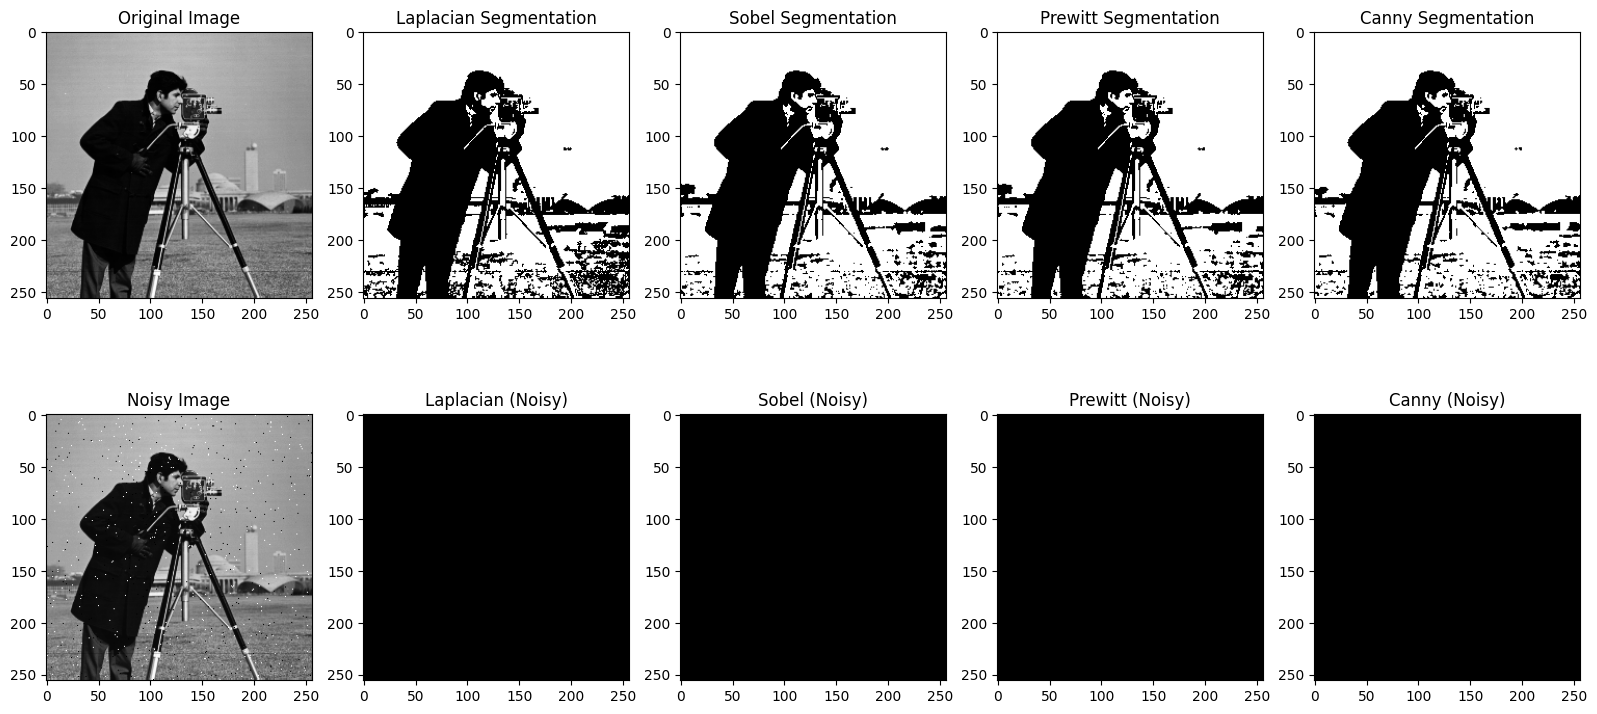

In [17]:
# Applying first order derivatives as elevation maps
segmented_img_laplacian = segmentation.watershed(laplace(img), markers)
segmented_img_sobel = segmentation.watershed(sobel(img), markers) 
segmented_img_prewitt = segmentation.watershed(prewitt(img), markers)
segmented_img_canny = segmentation.watershed(canny(img), markers)

# Add random salt & pepper noise to the image and get new markers
noisy_img = random_noise(img, mode='s&p', amount=0.01)
markers_noisy = np.zeros_like(noisy_img, dtype=np.int32)
markers_noisy[noisy_img < 100] = 1
markers_noisy[noisy_img > 125] = 2

# segmenting them again with all the elevation maps
segmented_img_laplacian_noisy = segmentation.watershed(laplace(noisy_img), markers_noisy)
segmented_img_sobel_noisy = segmentation.watershed(sobel(noisy_img), markers_noisy) 
segmented_img_prewitt_noisy = segmentation.watershed(prewitt(noisy_img), markers_noisy)
segmented_img_canny_noisy = segmentation.watershed(canny(noisy_img), markers_noisy)

plt.figure(figsize=(16, 8))

plt.subplot(2, 5, 1), plt.imshow(img, cmap="gray"), plt.title("Original Image")
plt.subplot(2, 5, 2), plt.imshow(segmented_img_laplacian, cmap="gray"), plt.title("Laplacian Segmentation")
plt.subplot(2, 5, 3), plt.imshow(segmented_img_sobel, cmap="gray"), plt.title("Sobel Segmentation")
plt.subplot(2, 5, 4), plt.imshow(segmented_img_prewitt, cmap="gray"), plt.title("Prewitt Segmentation")
plt.subplot(2, 5, 5), plt.imshow(segmented_img_canny, cmap="gray"), plt.title("Canny Segmentation")

plt.subplot(2, 5, 6), plt.imshow(noisy_img, cmap="gray"), plt.title("Noisy Image")
plt.subplot(2, 5, 7), plt.imshow(segmented_img_laplacian_noisy, cmap="gray"), plt.title("Laplacian (Noisy)")
plt.subplot(2, 5, 8), plt.imshow(segmented_img_sobel_noisy, cmap="gray"), plt.title("Sobel (Noisy)")
plt.subplot(2, 5, 9), plt.imshow(segmented_img_prewitt_noisy, cmap="gray"), plt.title("Prewitt (Noisy)")
plt.subplot(2, 5, 10), plt.imshow(segmented_img_canny_noisy, cmap="gray"), plt.title("Canny (Noisy)")

plt.tight_layout()

**Observations**
- Changing the elevation maps used for watershedding brought little to no changes.
- Adding even a little bit of noise to the same image results in oversegmentation as clear from the results above.

### Task 5
Write a python code to prove that “Laplacian” operator is an “isotropic” operator.

**Hint:** An isotropic operator in an image processing context is one which applies equally well in all directions in an image, with no particular sensitivity or bias towards one particular set of directions

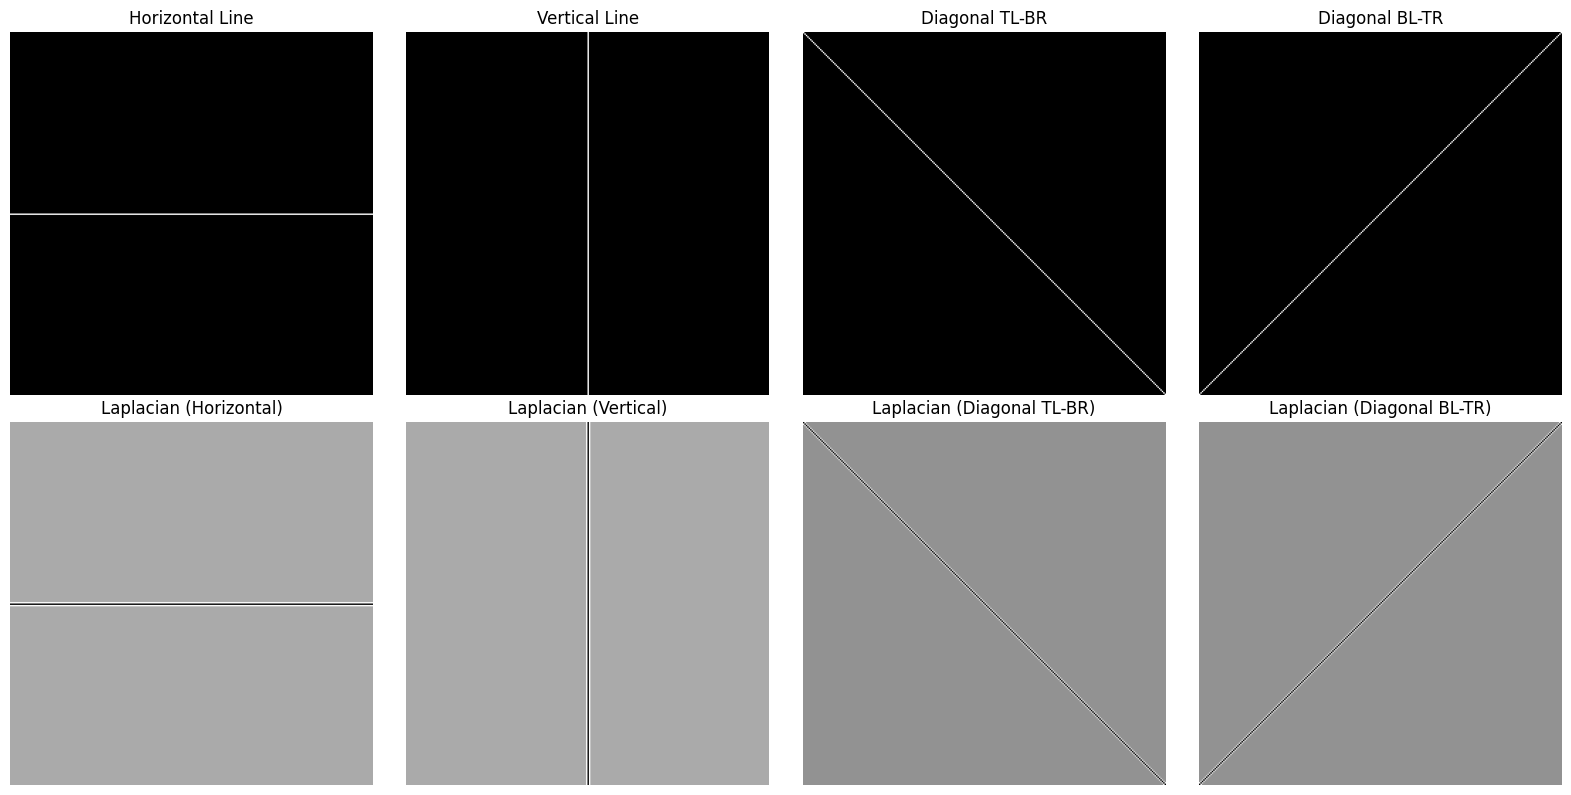

In [18]:
size = (256, 256)
images = []
laplacian_images = []

# Horizontal line
img = np.zeros(size, dtype=np.uint8)
img[size[0] // 2, :] = 255
images.append(img)
laplacian_images.append(cv.Laplacian(img, cv.CV_64F))

# Vertical line
img = np.zeros(size, dtype=np.uint8)
img[:, size[1] // 2] = 255
images.append(img)
laplacian_images.append(cv.Laplacian(img, cv.CV_64F))

# Diagonal line (top-left to bottom-right) using np.eye
img = np.eye(size[0], dtype=np.uint8)
images.append(img)
laplacian_images.append(cv.Laplacian(img, cv.CV_64F))

# Diagonal line (bottom-left to top-right) using np.fliplr
img = np.fliplr(np.eye(size[0], dtype=np.uint8))
images.append(img)
laplacian_images.append(cv.Laplacian(img, cv.CV_64F))

plt.figure(figsize=(16, 8))

titles = ['Horizontal Line', 'Vertical Line', 'Diagonal TL-BR', 'Diagonal BL-TR']
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis('off')

laplacian_titles = ['Laplacian (Horizontal)', 'Laplacian (Vertical)', 'Laplacian (Diagonal TL-BR)', 'Laplacian (Diagonal BL-TR)']
for i, (img, title) in enumerate(zip(laplacian_images, laplacian_titles)):
    plt.subplot(2, 4, i + 5)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis('off')

plt.tight_layout()

**Hence proved.**